In [17]:
import pandas as pd
import numpy as np
import seaborn as sns

df_trades = pd.read_csv("../results/nifty_backtest_test_results.csv")


In [18]:
df_trades["pnl"] = df_trades["strategy_return"]
df_trades["pnl_zscore"] = (
    (df_trades["pnl"] - df_trades["pnl"].mean()) /
    df_trades["pnl"].std()
)

outliers = df_trades[df_trades["pnl_zscore"].abs() > 3]
normal_trades = df_trades[df_trades["pnl_zscore"].abs() <= 3]



In [19]:
print("Total trades:", len(df_trades))
print("Outlier trades:", len(outliers))
print("Outlier %:", round(len(outliers) / len(df_trades) * 100, 2))


Total trades: 5596
Outlier trades: 53
Outlier %: 0.95


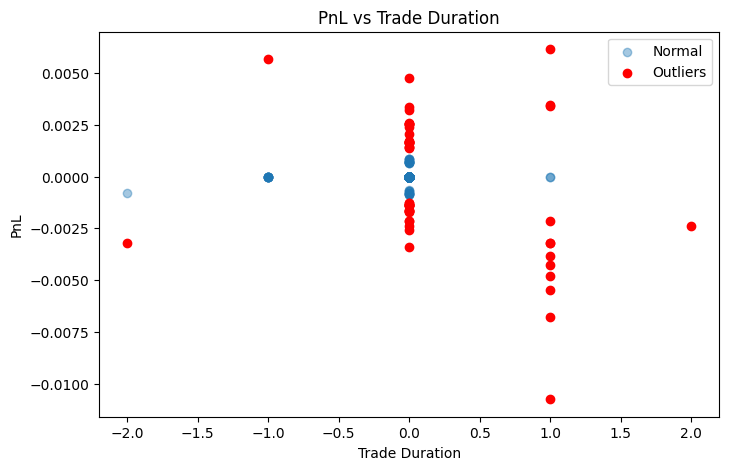

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(
    normal_trades["trade_change"],
    normal_trades["pnl"],
    alpha=0.4,
    label="Normal"
)
plt.scatter(
    outliers["trade_change"],
    outliers["pnl"],
    color="red",
    label="Outliers"
)
plt.xlabel("Trade Duration")
plt.ylabel("PnL")
plt.legend()
plt.title("PnL vs Trade Duration")
plt.show()


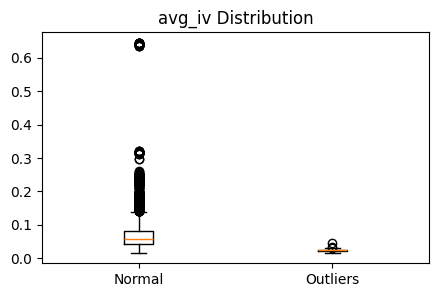

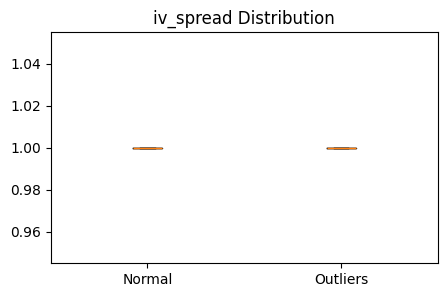

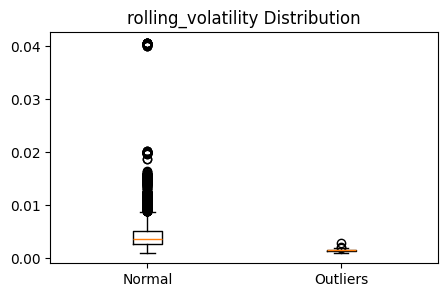

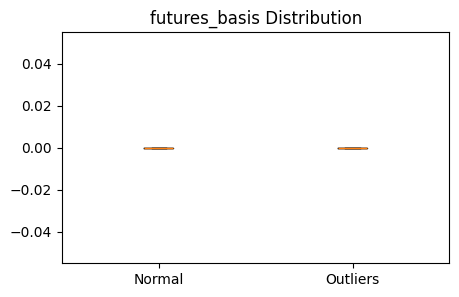

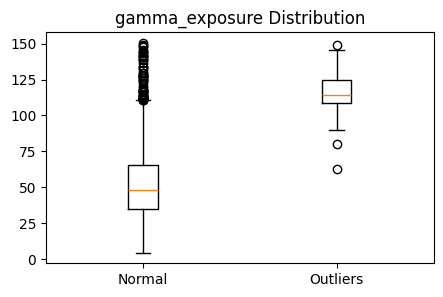

In [21]:
features = [
    "avg_iv",
    "iv_spread",
    "rolling_volatility",
    "futures_basis",
    "gamma_exposure"
]

for f in features:
    plt.figure(figsize=(5,3))
    plt.boxplot(
        [normal_trades[f].dropna(), outliers[f].dropna()],
        labels=["Normal", "Outliers"]
    )
    plt.title(f"{f} Distribution")
    plt.show()


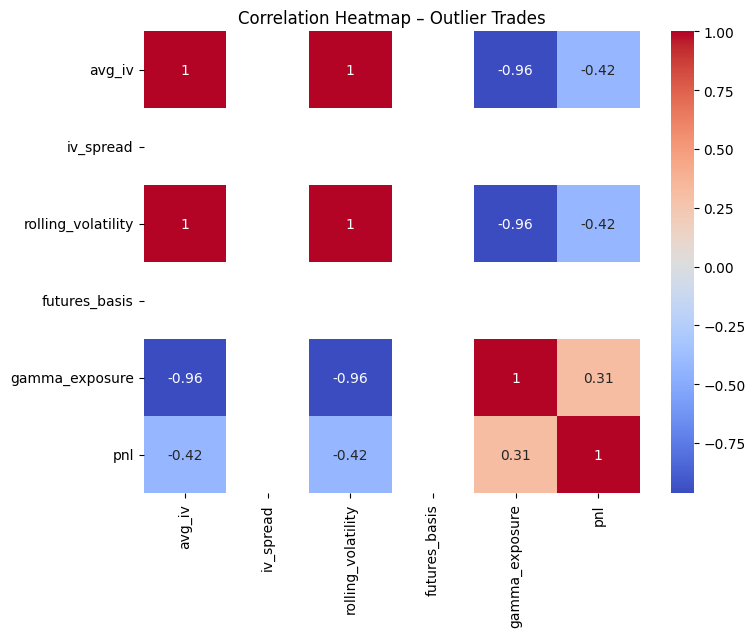

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(
    outliers[features + ["pnl"]].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Heatmap – Outlier Trades")
plt.show()


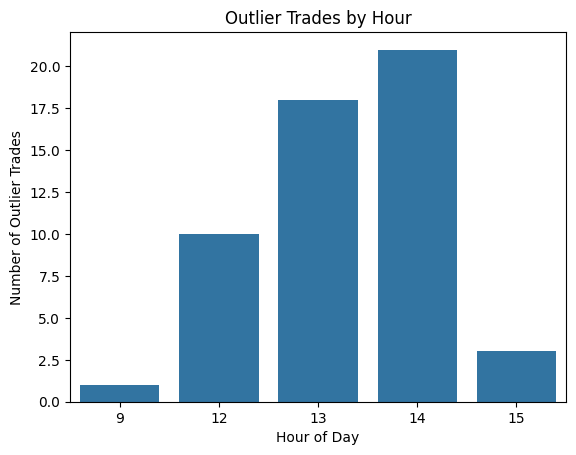

In [23]:
df_trades["hour"] = pd.to_datetime(df_trades["datetime"]).dt.hour
outliers = outliers.copy()
outliers.loc[:, "hour"] = pd.to_datetime(outliers["datetime"]).dt.hour


sns.countplot(x="hour", data=outliers)
plt.title("Outlier Trades by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Outlier Trades")
plt.show()


In [24]:
outlier_summary = pd.DataFrame({
    "Metric": [
        "Total Trades",
        "Outlier Trades",
        "Outlier Percentage",
        "Mean Outlier PnL",
        "Mean Normal PnL"
    ],
    "Value": [
        len(df_trades),
        len(outliers),
        round(len(outliers) / len(df_trades) * 100, 2),
        outliers["pnl"].mean(),
        df_trades.loc[~df_trades.index.isin(outliers.index), "pnl"].mean()
    ]
})

outlier_summary.to_csv("../results/outlier_summary.csv", index=False)
